In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
ls

benchmark_visualizations.ipynb  dense_model_on_pride/
cnn_model_on_pdeep/             pdeep_dataset_file_paths.json
cnn_model_on_pride/             pride_dataset_file_paths.json
dense_model_on_pdeep/           transformer_model_on_pdeep/


In [20]:
dirs = {
    'cnn_model_on_pdeep': "lstm/pdeep",
    'cnn_model_on_pride': "lstm/pride",
    'dense_model_on_pdeep': "dense/pdeep",
    'dense_model_on_pride': "dense/pride",
    'transformer_model_on_pdeep': "transformer/pdeep",
}

In [21]:
import numpy as np

In [34]:
dfs = dict()

for d, name in dirs.items():
    df = pd.read_csv(f"{d}/log.csv")
    df = df.set_index('epoch')
    dfs[name] = df

In [35]:
for model, df in dfs.items():
    print(f"{df.index.max()} epochs for {model}")

73 epochs for lstm/pdeep
99 epochs for lstm/pride
73 epochs for dense/pdeep
99 epochs for dense/pride
98 epochs for transformer/pdeep


In [36]:
for model, df in dfs.items():
    dfs[model] = df[df.index <= 73]

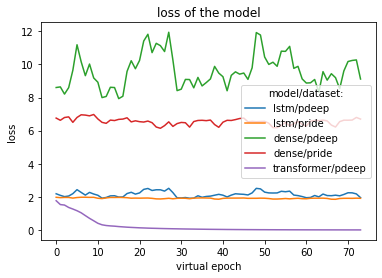

In [42]:
for model, df in dfs.items():
    plt.plot(df.index, df.loss, label=model)

plt.xlabel("virtual epoch")
plt.ylabel("loss")
plt.title("loss of the model")
plt.legend(title="model/dataset:")
plt.show()

In [40]:
dfs['lstm/pdeep'].columns

Index(['jaccard_batch_distance', 'leuvenshtein_batch_distance', 'loss',
       'sparse_categorical_accuracy', 'val_jaccard_batch_distance',
       'val_leuvenshtein_batch_distance', 'val_loss',
       'val_sparse_categorical_accuracy'],
      dtype='object')

In [62]:
figure_plan = [
    (['loss', 'val_loss'], "Sparse Categorical Crossentropy", "lower is better"),
    (['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'], "Sparse Categorical Accuracy", "higher is better"),
    (['jaccard_batch_distance', 'val_jaccard_batch_distance'], "Jaccard Distance", "higher is better"),
    (['leuvenshtein_batch_distance', 'val_leuvenshtein_batch_distance'], "Leuvenshtein Distance", "lower is better"),
]

In [74]:
size_per_subplot = 5

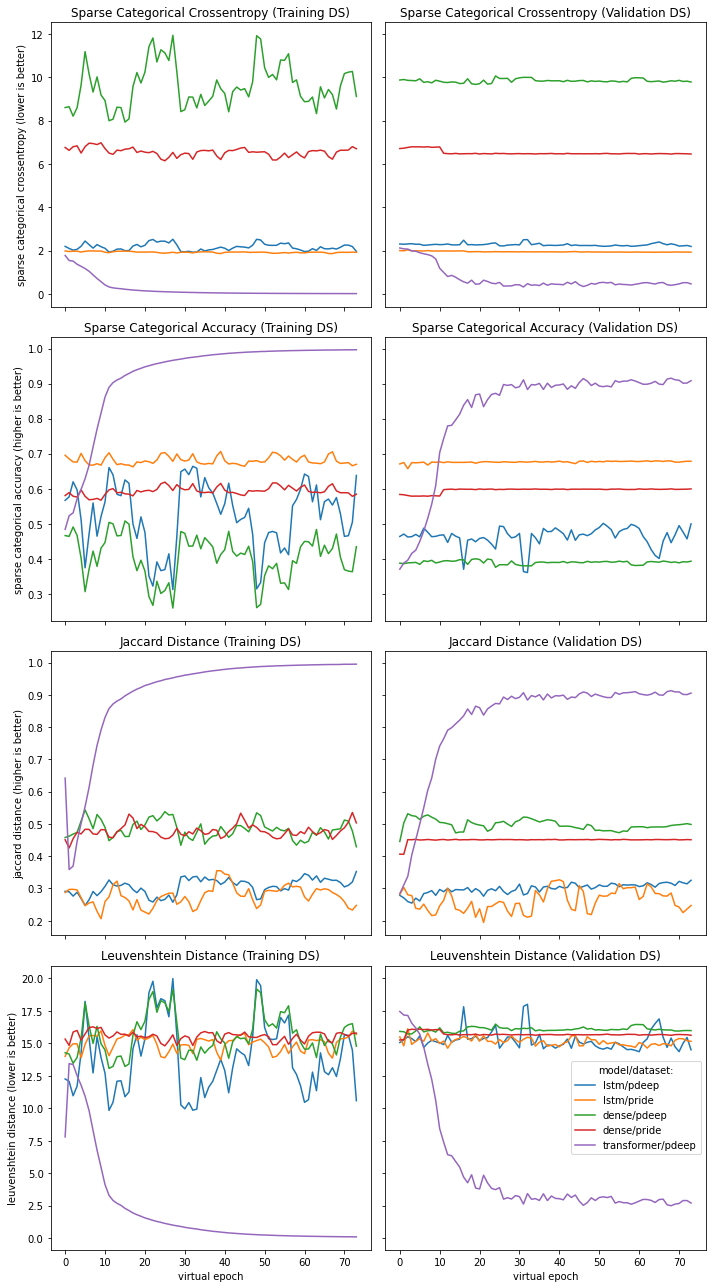

In [77]:
fig, axs = plt.subplots(
    nrows=len(figure_plan), 
    ncols=2,
    sharex=True,
    sharey='row',
    figsize=(2 * size_per_subplot, len(figure_plan) * size_per_subplot * 0.9), 
)

for row, (metrics, label, comment) in enumerate(figure_plan):
    for col, metric in enumerate(metrics):
        for model, df in dfs.items():
            ax = axs[row][col]
            ax.plot(df.index, df[metric], label=model)
            title = label
            if metric.startswith("val_"):
                title = f"{title} (Validation DS)"
            else:
                title = f"{title} (Training DS)"
            ax.set_title(title)
            if row == 3:
                ax.set_xlabel("virtual epoch")
            if col == 0:
                ax.set_ylabel(f"{label.lower()} ({comment})")

plt.legend(title="model/dataset:")
fig.tight_layout()


plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('TF_model_benchmark.pdf')
plt.savefig('TF_model_benchmark.png')
plt.savefig('TF_model_benchmark.svg')

plt.show()